## **Data Collection**



**Loading Data**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('GOOG.csv')

In [ ]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


## **DATA PREPROCESSING**



**Data Cleaning**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1254,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [ ]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


**Convert date into DateTime Datatype**

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.dtypes

symbol                      object
date           datetime64[ns, UTC]
close                      float64
high                       float64
low                        float64
open                       float64
volume                       int64
adjClose                   float64
adjHigh                    float64
adjLow                     float64
adjOpen                    float64
adjVolume                    int64
divCash                    float64
splitFactor                float64
dtype: object

In [ ]:
numerical_columns=[]
categorical_columns=[]
for column in data.columns:
  if data[column].dtype == 'object' or data[column].dtype == 'datetime64[ns, UTC]' :
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

print("Numerical Columns:",numerical_columns)
print("categorical Columns :",categorical_columns)

Numerical Columns: ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']
categorical Columns : ['symbol', 'date']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       1258 non-null   object             
 1   date         1258 non-null   datetime64[ns, UTC]
 2   close        1258 non-null   float64            
 3   high         1258 non-null   float64            
 4   low          1258 non-null   float64            
 5   open         1258 non-null   float64            
 6   volume       1258 non-null   int64              
 7   adjClose     1258 non-null   float64            
 8   adjHigh      1258 non-null   float64            
 9   adjLow       1258 non-null   float64            
 10  adjOpen      1258 non-null   float64            
 11  adjVolume    1258 non-null   int64              
 12  divCash      1258 non-null   float64            
 13  splitFactor  1258 non-null   float64            
dtypes: datetime64[ns, UTC](1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       1258 non-null   object             
 1   date         1258 non-null   datetime64[ns, UTC]
 2   close        1258 non-null   float64            
 3   high         1258 non-null   float64            
 4   low          1258 non-null   float64            
 5   open         1258 non-null   float64            
 6   volume       1258 non-null   int64              
 7   adjClose     1258 non-null   float64            
 8   adjHigh      1258 non-null   float64            
 9   adjLow       1258 non-null   float64            
 10  adjOpen      1258 non-null   float64            
 11  adjVolume    1258 non-null   int64              
 12  divCash      1258 non-null   float64            
 13  splitFactor  1258 non-null   float64            
dtypes: datetime64[ns, UTC](1

## **DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Line Plot for Stock Prices**

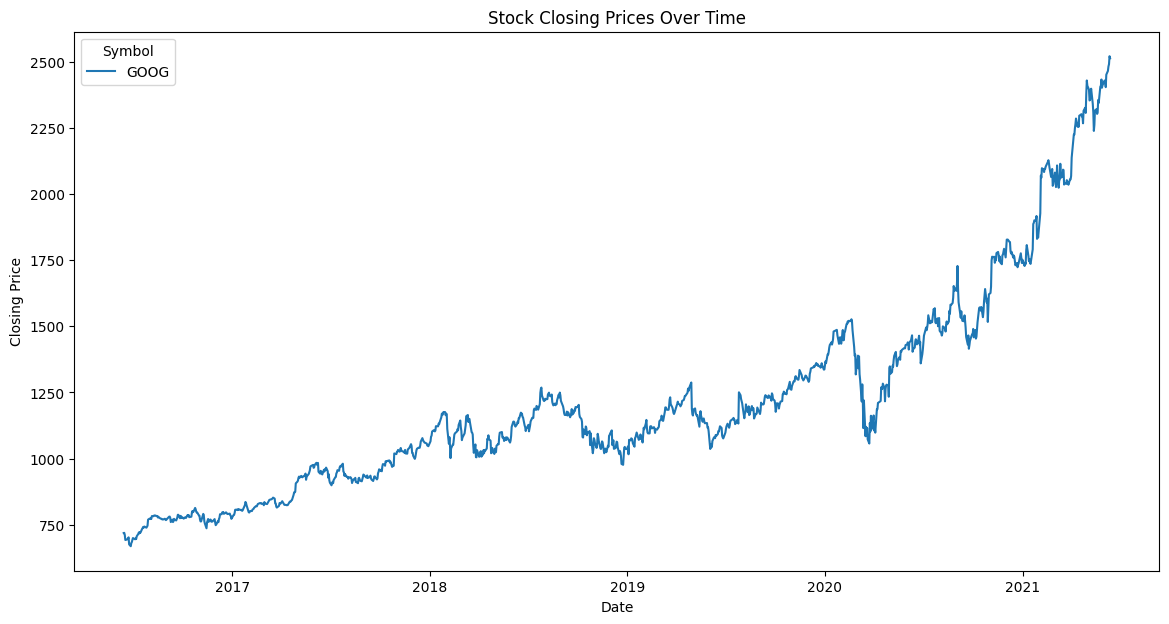

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='date', y='close', hue='symbol')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Symbol')
plt.show()


**Volume Traded Over Time**

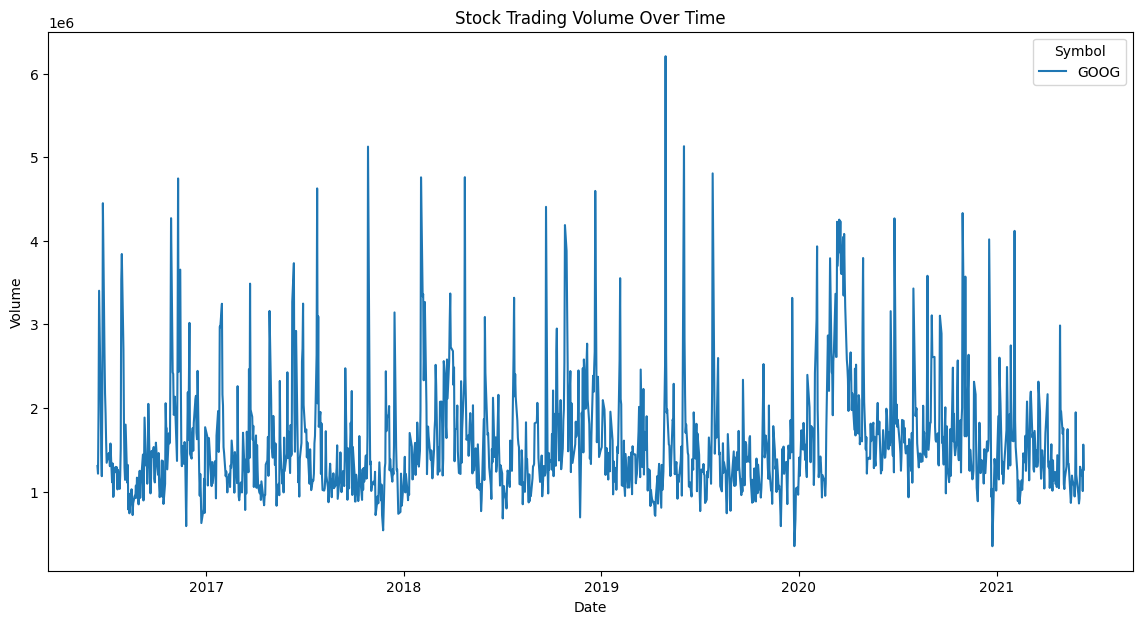

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='date', y='volume', hue='symbol')
plt.title('Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Symbol')
plt.show()


**High, Low, Open, and Close Prices**

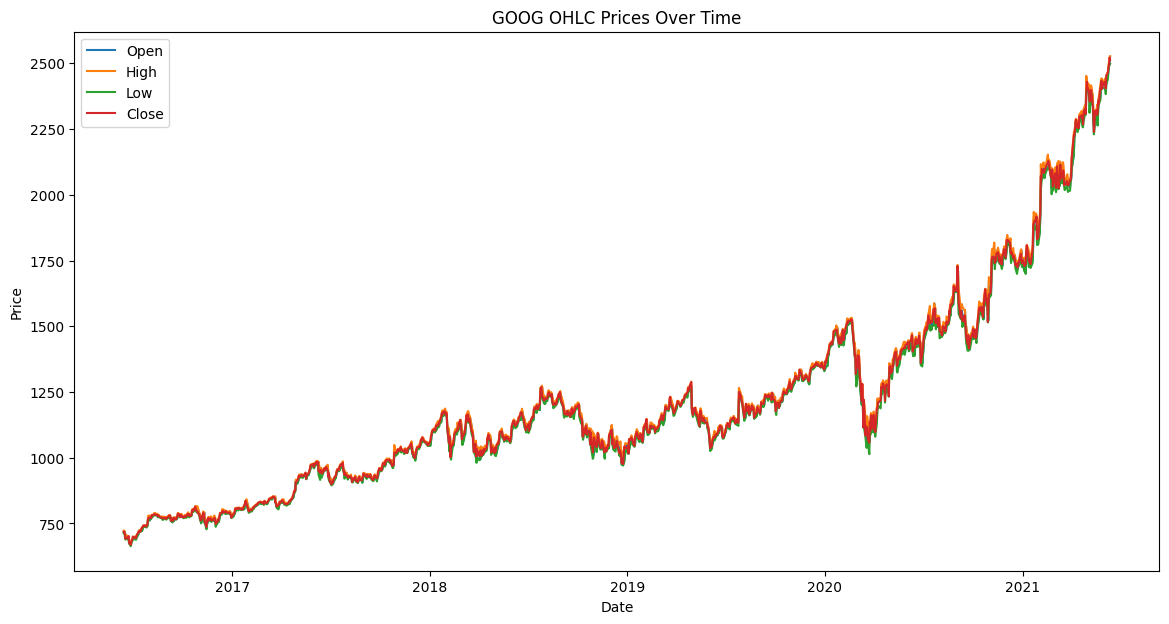

In [ ]:
symbol = 'GOOG'
symbol_data = data[data['symbol'] == symbol]

plt.figure(figsize=(14, 7))
plt.plot(symbol_data['date'], symbol_data['open'], label='Open')
plt.plot(symbol_data['date'], symbol_data['high'], label='High')
plt.plot(symbol_data['date'], symbol_data['low'], label='Low')
plt.plot(symbol_data['date'], symbol_data['close'], label='Close')
plt.title(f'{symbol} OHLC Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


**Distribution of Adjusted Close Prices**

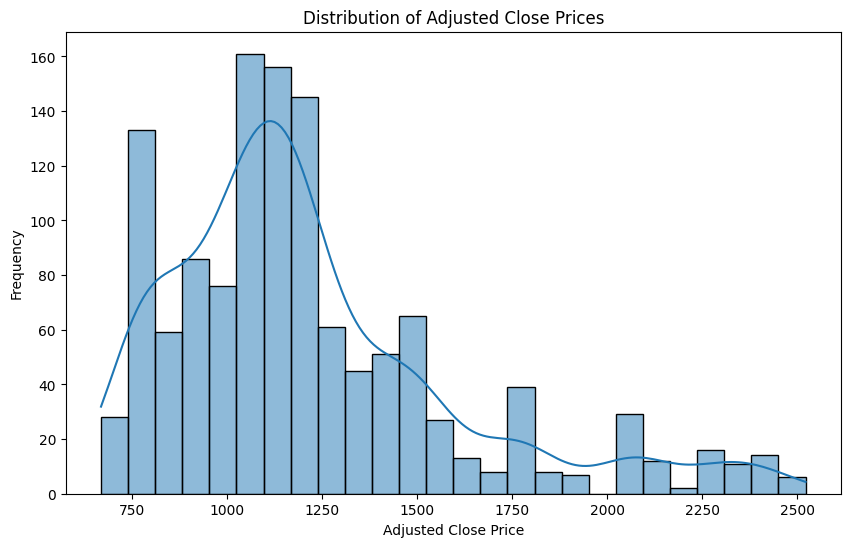

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='adjClose', kde=True)
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()


**Box Plot for Comparing Stocks**

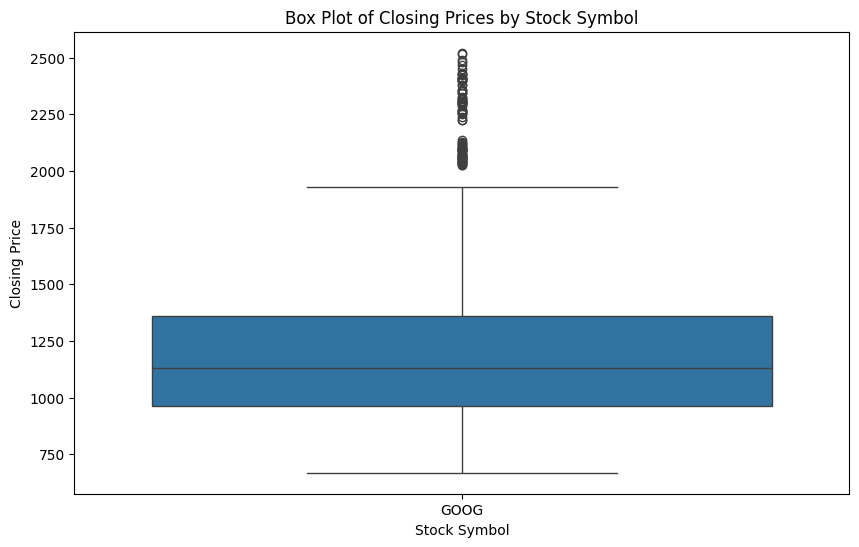

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='symbol', y='close')
plt.title('Box Plot of Closing Prices by Stock Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Closing Price')
plt.show()


**Correlation Heatmap**

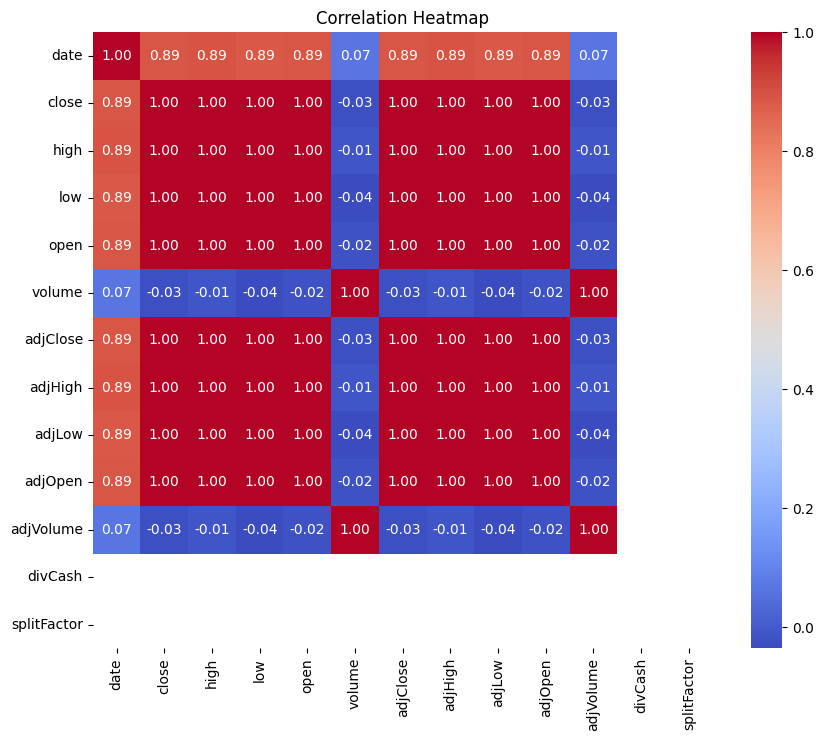

In [ ]:
# Drop non-numerical columns before calculating correlation
numerical_data = data.drop('symbol', axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## **FEATURE ENGINEERING**

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
label = LabelEncoder()
scalerx = StandardScaler()
scalery = StandardScaler()

**LabelEncoder**

In [ ]:
encoding_mapping = {}
for column in categorical_columns:
  print(column)
  data[column] = label.fit_transform(data[column])
  encoding_mapping[column] = dict(zip(label.classes_, label.transform(label.classes_)))

symbol
date


In [ ]:
encoding_mapping

{'symbol': {'GOOG': 0},
 'date': {Timestamp('2016-06-14 00:00:00+0000', tz='UTC'): 0,
  Timestamp('2016-06-15 00:00:00+0000', tz='UTC'): 1,
  Timestamp('2016-06-16 00:00:00+0000', tz='UTC'): 2,
  Timestamp('2016-06-17 00:00:00+0000', tz='UTC'): 3,
  Timestamp('2016-06-20 00:00:00+0000', tz='UTC'): 4,
  Timestamp('2016-06-21 00:00:00+0000', tz='UTC'): 5,
  Timestamp('2016-06-22 00:00:00+0000', tz='UTC'): 6,
  Timestamp('2016-06-23 00:00:00+0000', tz='UTC'): 7,
  Timestamp('2016-06-24 00:00:00+0000', tz='UTC'): 8,
  Timestamp('2016-06-27 00:00:00+0000', tz='UTC'): 9,
  Timestamp('2016-06-28 00:00:00+0000', tz='UTC'): 10,
  Timestamp('2016-06-29 00:00:00+0000', tz='UTC'): 11,
  Timestamp('2016-06-30 00:00:00+0000', tz='UTC'): 12,
  Timestamp('2016-07-01 00:00:00+0000', tz='UTC'): 13,
  Timestamp('2016-07-05 00:00:00+0000', tz='UTC'): 14,
  Timestamp('2016-07-06 00:00:00+0000', tz='UTC'): 15,
  Timestamp('2016-07-07 00:00:00+0000', tz='UTC'): 16,
  Timestamp('2016-07-08 00:00:00+0000', tz=

In [ ]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,0,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,0,1,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,0,2,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,0,3,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,0,4,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


### **MODEL SELECTION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,precision_recall_curve, roc_curve, roc_auc_score,auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

**LSTM**

In [ ]:
# Split the data into training and testing sets
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [ ]:
# Reshape the data to fit the LSTM model requirements
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 1])  # 'date' is the target variable
    return np.array(X), np.array(Y)

In [ ]:
look_back =  3
lstm_X_train, lstm_y_train = create_dataset(train_data, look_back)
lstm_X_test, lstm_y_test = create_dataset(test_data, look_back)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, len(data.columns))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(lstm_X_train, lstm_y_train, epochs=150, batch_size=1, verbose=2)

Epoch 1/150
1002/1002 - 7s - loss: 0.0174 - 7s/epoch - 7ms/step
Epoch 2/150
1002/1002 - 6s - loss: 0.0022 - 6s/epoch - 6ms/step
Epoch 3/150
1002/1002 - 4s - loss: 0.0023 - 4s/epoch - 4ms/step
Epoch 4/150
1002/1002 - 4s - loss: 0.0011 - 4s/epoch - 4ms/step
Epoch 5/150
1002/1002 - 6s - loss: 0.0010 - 6s/epoch - 6ms/step
Epoch 6/150
1002/1002 - 4s - loss: 9.6972e-04 - 4s/epoch - 4ms/step
Epoch 7/150
1002/1002 - 4s - loss: 9.6902e-04 - 4s/epoch - 4ms/step
Epoch 8/150
1002/1002 - 5s - loss: 0.0013 - 5s/epoch - 5ms/step
Epoch 9/150
1002/1002 - 4s - loss: 0.0019 - 4s/epoch - 4ms/step
Epoch 10/150
1002/1002 - 5s - loss: 3.7835e-04 - 5s/epoch - 5ms/step
Epoch 11/150
1002/1002 - 5s - loss: 3.7367e-04 - 5s/epoch - 5ms/step
Epoch 12/150
1002/1002 - 4s - loss: 8.2276e-04 - 4s/epoch - 4ms/step
Epoch 13/150
1002/1002 - 5s - loss: 4.4008e-04 - 5s/epoch - 5ms/step
Epoch 14/150
1002/1002 - 5s - loss: 8.7594e-04 - 5s/epoch - 5ms/step
Epoch 15/150
1002/1002 - 4s - loss: 6.3094e-04 - 4s/epoch - 4ms/step
Ep

In [ ]:
# Make predictions
y_lstm_pred = model.predict(lstm_X_test)

8/8 [==============================] - 1s 3ms/step


In [ ]:
y_lstm_pred

array([[1.0501032],
       [1.0536892],
       [1.0580659],
       [1.0584843],
       [1.0559621],
       [1.0682349],
       [1.0691414],
       [1.0716965],
       [1.0725045],
       [1.064111 ],
       [1.0818129],
       [1.0790272],
       [1.0825169],
       [1.0839384],
       [1.0900648],
       [1.0928552],
       [1.0953112],
       [1.0962753],
       [1.0960898],
       [1.1046109],
       [1.1047285],
       [1.1084008],
       [1.1107566],
       [1.1126056],
       [1.1110494],
       [1.1203496],
       [1.1243501],
       [1.126544 ],
       [1.1263676],
       [1.1312544],
       [1.1318567],
       [1.1380653],
       [1.1360807],
       [1.1304855],
       [1.1425576],
       [1.1455262],
       [1.1461194],
       [1.1481459],
       [1.1554899],
       [1.1584504],
       [1.159096 ],
       [1.1603053],
       [1.1644919],
       [1.1676762],
       [1.1676424],
       [1.1660662],
       [1.1730957],
       [1.1727693],
       [1.176702 ],
       [1.1797557],


In [ ]:
lstm_y_test = lstm_y_test.reshape(-1,1)

In [ ]:
# Calculate evaluation metrics
lstm_mse = mean_squared_error(lstm_y_test, y_lstm_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(lstm_y_test, y_lstm_pred)


In [ ]:
print(f'Train MSE: {lstm_mse:.2f}')
print(f'Train RMSE: {lstm_rmse:.2f}')
print(f'Train R2: {lstm_r2:.2f}')

Train MSE: 0.02
Train RMSE: 0.13
Train R2: 0.58


**Residual Plot**

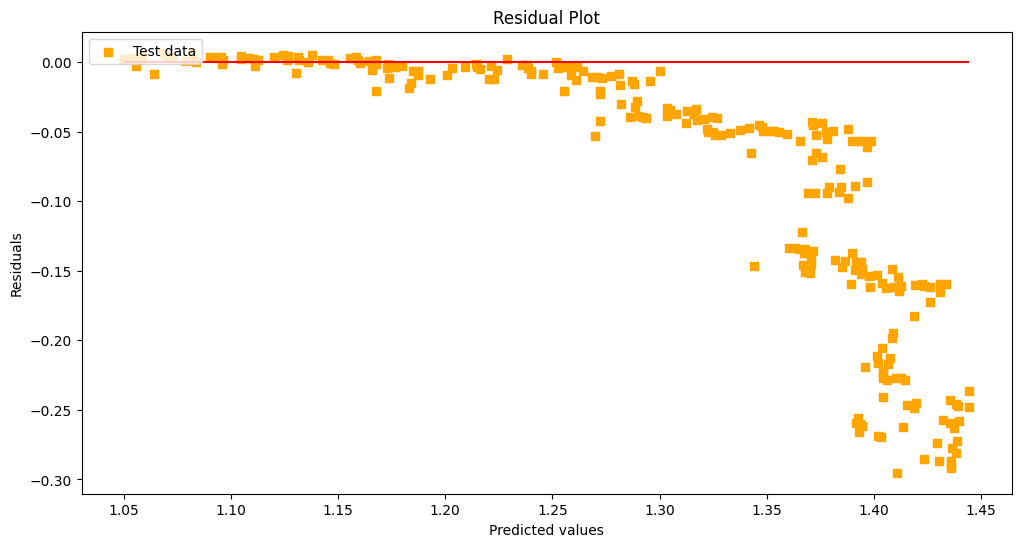

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_lstm_pred,(y_lstm_pred - lstm_y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_lstm_pred.min(), xmax=y_lstm_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

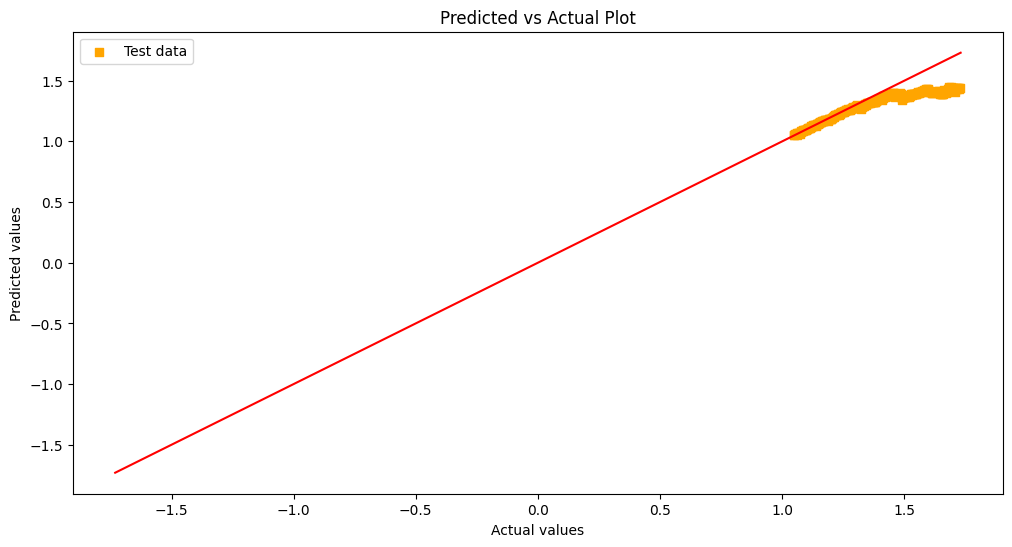

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(lstm_y_test, y_lstm_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()